In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins

In [142]:
## Creating the dfs from csv ##

crime_data_df = pd.read_csv("../data/crime.csv")
crime_data_df.describe

crime_data_sample_df = pd.read_csv("../data/crime.csv").sample(500)
crime_data_sample_df

offense_codes_df = pd.read_csv("../data/offense_codes.csv")

In [150]:
## Adding 'Year' and 'Month' columns to df ##

crime_data_sample_df.drop("LAST_OCCURRENCE_DATE", axis=1)
crime_data_sample_df['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(crime_data_sample_df['FIRST_OCCURRENCE_DATE'])
crime_data_sample_df['OCCURRENCE YEAR'] = crime_data_sample_df['FIRST_OCCURRENCE_DATE'].dt.year
crime_data_sample_df['OCCURRENCE MONTH'] = crime_data_sample_df['FIRST_OCCURRENCE_DATE'].dt.month
crime_data_sample_df.sort_values('incident_id')

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OCCURRENCE YEAR,OCCURRENCE MONTH
138456,2019202,2019202544100,5441,0,traffic-accident,traffic-accident,2019-01-01 01:16:00,NaN,1/1/2019 1:32:00 AM,700 BLOCK N SHERIDAN BLVD,...,1690516.0,-105.053158,39.728421,1.0,122.0,villa-park,0,1,2019,1
276048,2022452,2022452131500,1315,0,aggravated-assault,aggravated-assault,2022-01-01 05:00:00,NaN,1/1/2022 9:01:00 AM,1736 S GARFIELD ST,...,1674923.0,-104.943847,39.685147,3.0,312.0,cory-merrill,1,0,2022,1
442865,20176101,20176101240400,2404,0,theft-of-motor-vehicle,auto-theft,2017-01-03 19:35:00,NaN,1/3/2017 8:18:00 PM,4600 BLK N ANAHEIM CT,...,1709547.0,-104.834016,39.779630,5.0,521.0,montbello,1,0,2017,1
396568,20179902,20179902239900,2399,0,theft-other,larceny,2017-01-05 07:00:00,1/5/2017 5:00:00 PM,1/5/2017 8:26:00 PM,2222 LAWRENCE ST,...,1700184.0,-104.988366,39.754698,6.0,611.0,five-points,1,0,2017,1
307912,20182196,20182196220400,2204,0,burglary-residence-no-force,burglary,2018-01-02 00:10:00,1/2/2018 12:10:00 AM,1/2/2018 2:15:00 AM,7255 LEETSDALE DR,...,1680242.0,-104.903992,39.699555,3.0,322.0,washington-virginia-vale,1,0,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113287,20218018439,20218018439540100,5401,0,traffic-accident-hit-and-run,traffic-accident,2021-04-23 23:55:00,NaN,4/24/2021 1:05:00 AM,E 40TH AVE / N PENA BLVD,...,1707161.0,-104.791484,39.772832,5.0,522.0,gateway-green-valley-ranch,0,1,2021,4
19141,20226000150,20226000150299901,2999,1,criminal-mischief-mtr-veh,public-disorder,2021-12-17 16:15:00,1/3/2022 6:30:00 AM,1/3/2022 4:54:00 PM,1490 DELGANY ST,...,1699187.0,-105.003878,39.752028,6.0,612.0,union-station,1,0,2021,12
462650,20226001876,20226001876230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,2022-01-30 11:00:00,1/30/2022 11:00:00 AM,1/30/2022 11:01:00 AM,1434 S PERRY ST,...,1676760.0,-105.039953,39.690606,4.0,421.0,mar-lee,1,0,2022,1
466707,20226002815,20226002815299901,2999,1,criminal-mischief-mtr-veh,public-disorder,2022-02-11 18:50:00,2/14/2022 6:50:00 AM,2/15/2022 7:03:00 AM,999 18TH ST,...,1698151.0,-104.992048,39.749133,6.0,611.0,cbd,1,0,2022,2


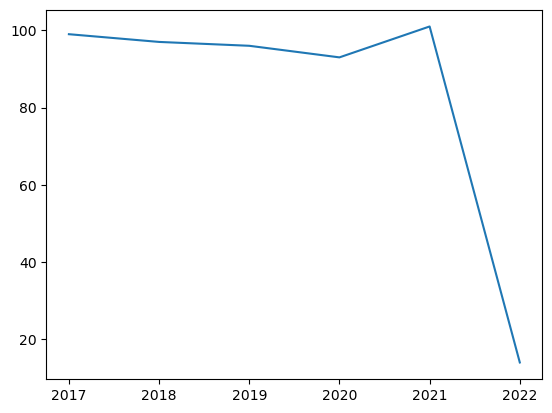

In [184]:
## Total Crime per Year ##

crimes_per_year = crime_data_sample_df['OCCURRENCE YEAR'].value_counts().sort_index()
crimes_per_year

fig, ax = plt.subplots()

ax.plot(crimes_per_year)


<BarContainer object of 7 artists>

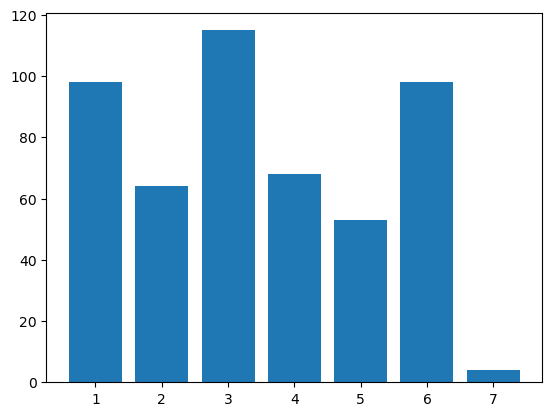

In [194]:
## Amount of Crime by Precinct ##

x = crime_data_sample_df.groupby('DISTRICT_ID').count()
x

fig, ax = plt.subplots()

ax.bar(x.index, x['incident_id'])

In [111]:
## Cleaning up lat/long data ##

y = crime_data_sample_df[['GEO_LAT', 'GEO_LON']]
y.dropna(inplace=True)

denver_crime_heatmap = folium.Map()
denver_crime_heatmap.add_child(plugins.HeatMap(data=y))
denver_crime_heatmap


/var/folders/w9/0y2smhf95qd_4dp0mg3n1vbh0000gn/T/ipykernel_2022/3762612822.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.dropna(inplace=True)


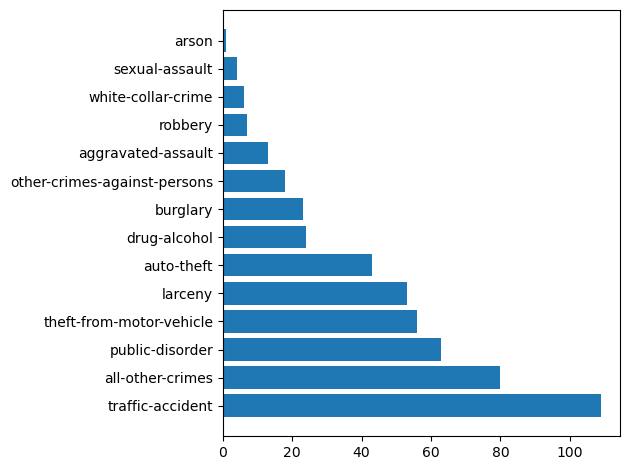

In [147]:
## Type of Crime over period ##

type_of_crime_per_year = crime_data_sample_df.groupby('OFFENSE_CATEGORY_ID').count().sort_values(by=['incident_id'], ascending=False)
type_of_crime_per_year

fig, ax = plt.subplots()

ax.barh(type_of_crime_per_year.index, type_of_crime_per_year['incident_id'])
# ax.tick_params(axis='x', labelrotation = 90)
fig.tight_layout()

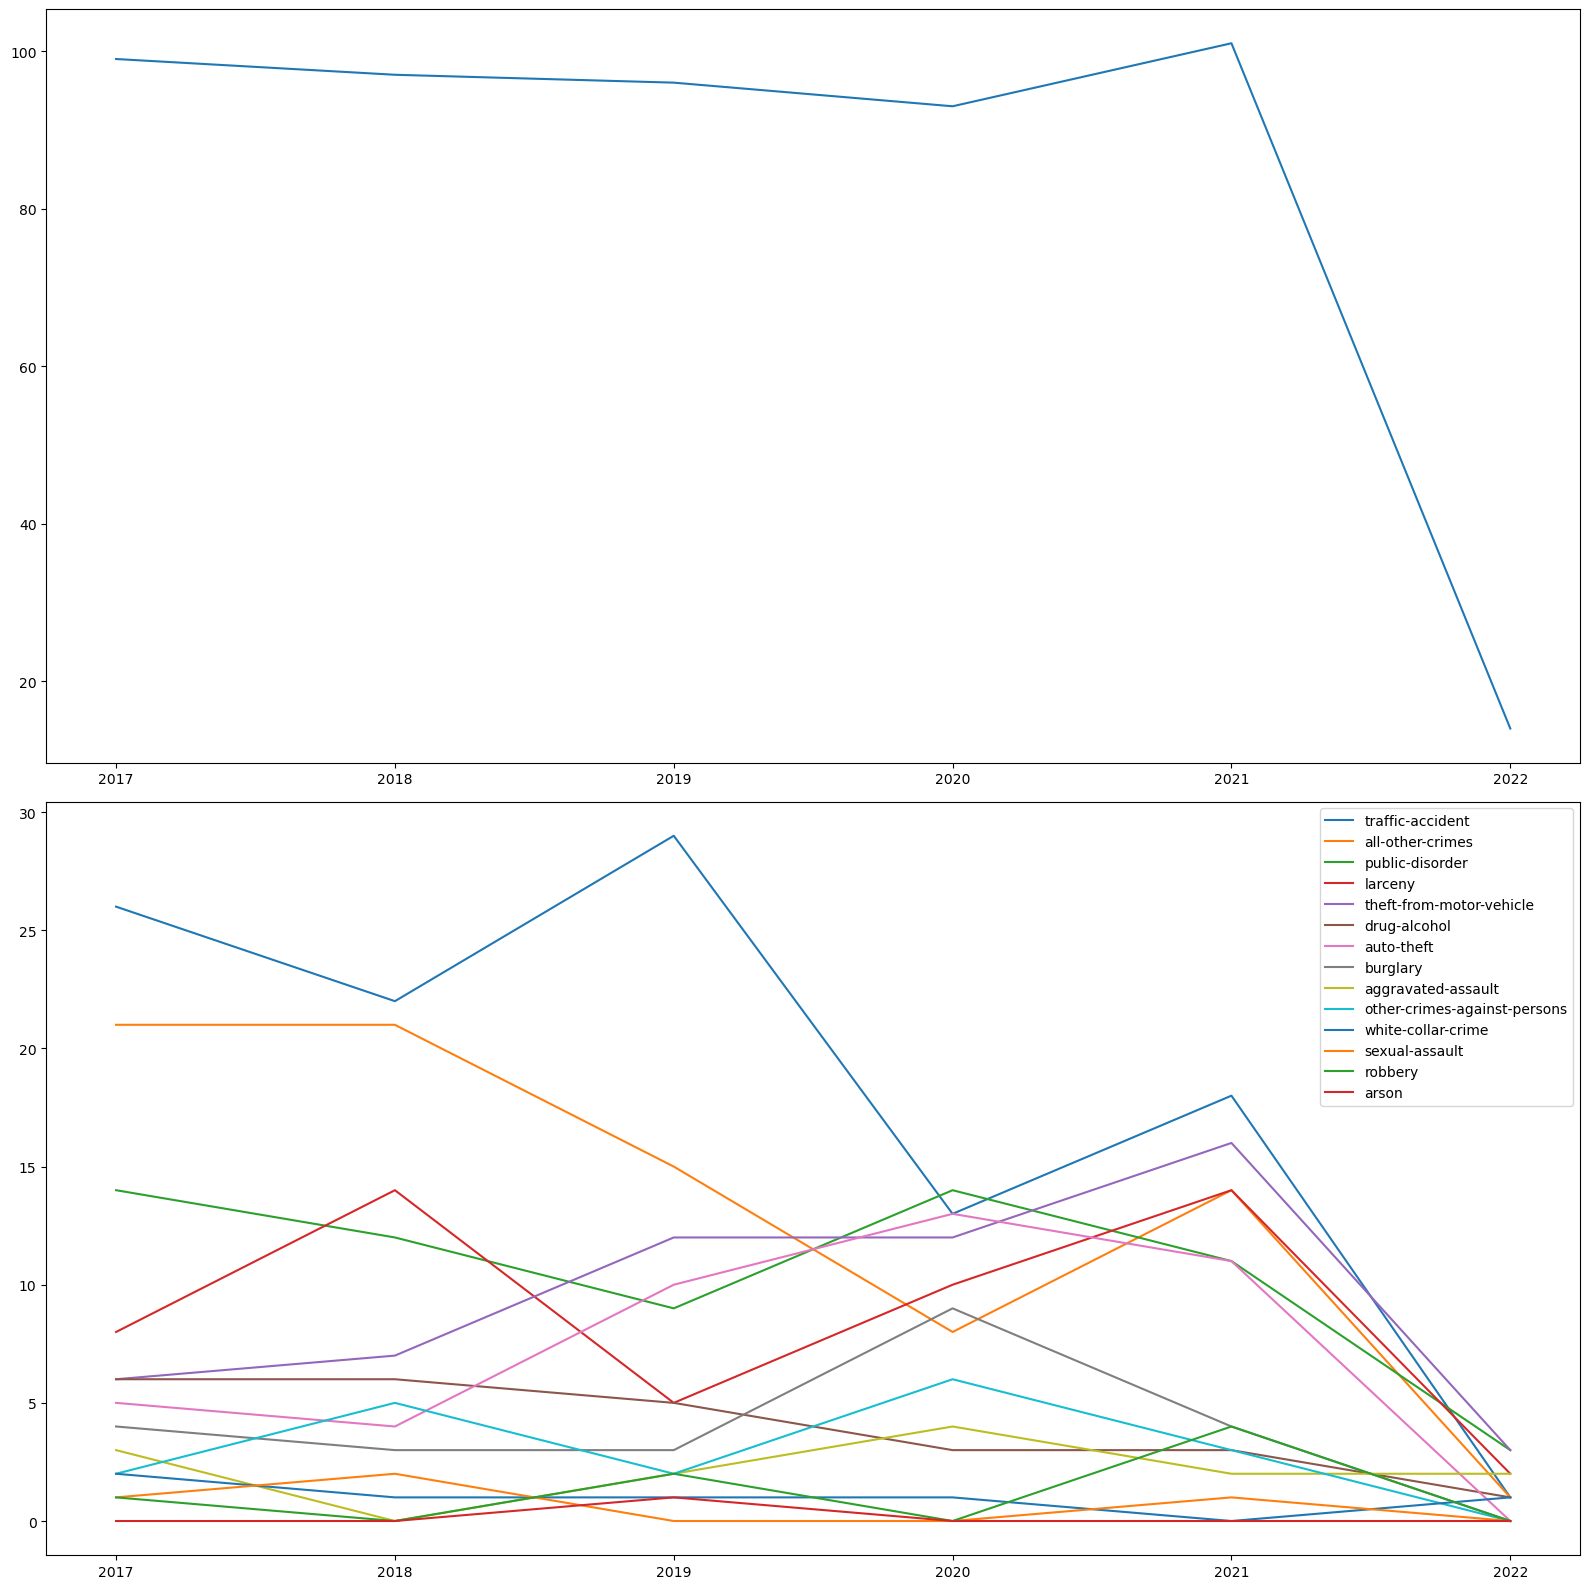

In [212]:
traffic_accident_by_year = crime_data_sample_df[crime_data_sample_df['OFFENSE_CATEGORY_ID'] == 'traffic-accident']
# traffic_accident_by_year[traffic_accident_by_year['OCCURRENCE YEAR'] == 2017].count()['incident_id']


## Ax 2 Figure ##
offense_cat_list = list(crime_data_sample_df['OFFENSE_CATEGORY_ID'].unique())
offense_cat_list
year_list = list(crime_data_sample_df['OCCURRENCE YEAR'].unique())
year_list

crime_by_cat_year = []
crime_by_cat_df = pd.DataFrame(index=offense_cat_list, columns=year_list)
crime_by_cat_df

for i in year_list:
    for j in offense_cat_list:
        x = crime_data_sample_df[(crime_data_sample_df['OFFENSE_CATEGORY_ID'] == j) & (crime_data_sample_df['OCCURRENCE YEAR'] == i)].count()['incident_id']
        crime_by_cat_year.append(x)
    crime_by_cat_df[i] = crime_by_cat_year
    crime_by_cat_year = []
crime_by_cat_df.sort_index(axis=1, ascending=True, inplace=True)
crime_by_cat_df.sort_values(by=[2017], ascending=False, inplace=True)
# crime_by_cat_df

# Ax 1 Figure ##
crimes_per_year = crime_data_sample_df['OCCURRENCE YEAR'].value_counts().sort_index()
crimes_per_year


# Plots ##
fig, axs = plt.subplots(2,1)

axs[0].plot(crimes_per_year)
axs[1].plot(crime_by_cat_df.transpose())
fig.set_size_inches(16,16)
axs[1].legend(labels=crime_by_cat_df.index)
fig.tight_layout()